# Práctica guiada

## Predicción de enfermedad cardíaca con Random Forest

<img src="img/heart-health-tips-animation-thumbnail.gif" alt="hearth">


El hospital de León quiere **predecir riesgo de enfermedad cardíaca** a partir de datos clínicos básicos de pacientes.


El objetivo **no es solo entrenar un modelo**, sino **decidir qué modelo es más adecuado**, cómo configurarlo y **explicar por qué**.

Trabajarás con:

* `heart.csv` → dataset completo
* `heart_disease_4features.csv` → versión reducida y más interpretable

El cuaderno base utiliza **Random Forest**, búsqueda de hiperparámetros y visualización de árboles .

---

## Resultados de aprendizaje trabajados

* **RA2.c** Define el modelo a implementar
* **RA2.d** Implementa la aplicación
* **RA2.e** Evalúa resultados

---

## Entrega

Un **notebook Jupyter** en formato PDF con:

* Código funcional
* Respuestas razonadas en Markdown
* Gráficas y métricas
* Conclusiones claras

---

## ¿Qué es Random Forest?

**Random Forest** es un algoritmo de **aprendizaje automático supervisado** que se utiliza tanto para **clasificación** como para **regresión**.

La idea principal es sencilla:

> En lugar de tomar una decisión con un solo árbol de decisión, Random Forest entrena **muchos árboles distintos** y combina sus resultados para obtener una predicción más fiable.

---

## ¿Cómo funciona?

1. Se crean **muchos subconjuntos distintos** del conjunto de entrenamiento (muestreo con reemplazo).
2. Con cada subconjunto se entrena **un árbol de decisión diferente**.
3. En cada árbol, las divisiones se hacen usando **solo una parte aleatoria de las variables**.
4. Para clasificar un nuevo dato:

   * Cada árbol da su predicción.
   * El modelo final decide por **votación mayoritaria**.

Este proceso reduce los errores debidos a:

* árboles demasiado complejos
* datos ruidosos
* sobreajuste al conjunto de entrenamiento

<img src="img/random-forest.png" alt="random forest">

---

## ¿Por qué no usar un solo árbol de decisión?

Un árbol de decisión:

* es fácil de entender
* pero **muy sensible a los datos**
* puede memorizar el entrenamiento (overfitting)

Random Forest soluciona esto porque:

* combina muchos árboles simples
* promedia sus decisiones
* generaliza mejor a datos nuevos

---

## Ventajas de Random Forest

* Funciona bien con **datos tabulares**
* No necesita normalización de variables
* Captura relaciones **no lineales**
* Es robusto frente al ruido
* Permite estimar la **importancia de las variables**

Por eso es muy utilizado en:

* medicina
* banca
* detección de fraude
* problemas reales con datos estructurados

---

## Inconvenientes

* Es menos interpretable que un solo árbol
* Consume más tiempo y recursos
* No es ideal cuando se necesita un modelo muy simple o explicable al 100%

Más información

[Machine Learning Google](https://developers.google.com/machine-learning/decision-forests?hl=es-419)

[Videotutorial: Random Forests con Python](https://www.youtube.com/watch?v=VfMPslt2wgA)

---

In [19]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score
)

## Parte 1 – Exploración y comprensión del dataset (obligatoria)

### 1.1 Carga de datos

Carga ambos datasets y responde:

In [20]:
df_largo = pd.read_csv('/workspaces/prog-ia-ut03-7-random-forest-Marckiuss-main/data/heart.csv')

df_largo = df_largo.dropna()

df_corto = pd.read_csv('/workspaces/prog-ia-ut03-7-random-forest-Marckiuss-main/data/heart_disease_4features.csv')
df_corto = df_corto.dropna()


print(df_largo.head())
print(df_corto.head())



   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
   Unnamed: 0  age  sex  trestbps  chol  target
0           0   52    1       125   212       0
1           1   53    1       140   203       0
2           2   70    1       145   174       0
3           3   61    1       148   203       0
4           4   62    0       138   294       0


<div style="background-color:green;color:white">

<br>

**Cuestiones (responde en Markdown):**

* ¿Cuántas variables tiene cada dataset?

        · El largo tiene 16 y el corto 5


* ¿Cuál crees que será más fácil de explicar a un médico?

        · El corto


* ¿Qué se pierde al reducir variables?

        · Profundidad en los datos y por tanto en las predicciones
<br>

---

### 1.2 Variable objetivo

<div style="background-color:green;color:white">

<br>

* Identifica claramente la variable *objetivo*

        · La variable objetivo es target

* Explica qué significa *0* y *1*

        · 0 significa que el paciente no tiene riesgo de sufrif enfermedad cardiaca y 1 Sí

* Comprueba si hay **desbalanceo de clases**

        · No hay desbalanceo, ya que prácticamente hay los mismos pacientes con riesgo que sin él


 <br>

In [21]:
# Comprobamos desbalanceo contando cuántos target de cada tipo (1 o 0) hay
conteo = df_largo['target'].value_counts()
print("Conteo de casos:")
print(conteo)

Conteo de casos:
target
1    526
0    499
Name: count, dtype: int64


## Parte 2 – Primer modelo Random Forest (baseline)

### 2.1 Separación train/test

Usa `train_test_split` con:

* `test_size=0.2`
* `random_state=42`



In [22]:
X_largo = df_largo.drop('target', axis=1)
y_largo = df_largo['target']

X_corto = df_corto.drop('target', axis=1)
y_corto = df_corto['target']

X_train_largo, X_test_largo, y_train_largo, y_test_largo = train_test_split(
    X_largo, y_largo, test_size=0.2, random_state=42
)

X_train_corto, X_test_corto, y_train_corto, y_test_corto = train_test_split(
    X_corto, y_corto, test_size=0.2, random_state=42
)

<div style="background-color:green;color:white">

<br>

* Explica **por qué fijar la semilla es importante**.

        · Para asegurar que la división de los datos sea la misma en cada ejecución y se puedan comparar los diferentes modelos sin que el azar en el reparto de datos tenga algo que ver


<br>

---

### 2.2 Entrenamiento inicial

Entrena un **Random Forest controlado**, es decir, **no utilices el modelo con los valores por defecto**.

Para ello:

* Crea un `RandomForestClassifier` fijando **explícitamente varios hiperparámetros**.
* Debes **limitar la complejidad del modelo** para evitar sobreajuste.
* Asegura que el entrenamiento sea **reproducible**.
* Evita que el modelo tome decisiones basadas en **muy pocos ejemplos**.
* (Opcional) Activa una estimación interna del rendimiento.

El modelo debe entrenarse con los datos de entrenamiento (`X_train`, `y_train`).

📌 **Ayuda**
Consulta la documentación oficial de [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) en *scikit-learn* para identificar qué hiperparámetros permiten:

* controlar la profundidad de los árboles,
* fijar el número de árboles,
* imponer un tamaño mínimo en las hojas,
* y garantizar reproducibilidad.




In [23]:
rf_controlado = RandomForestClassifier(
    n_estimators=100,       # Número de árboles (estándar razonable)
    max_depth=5,            # Limita la complejidad (evita árboles infinitos)
    min_samples_leaf=5,     # Evita decisiones con pocos ejemplos (menos de 5 pacientes)
    random_state=42,        # Asegura reproducibilidad (semilla fija)
    oob_score=True,         # (Opcional) Activa estimación interna
    n_jobs=-1               # (Extra) Usa todos los núcleos del PC para ir más rápido
)

# Entrenando el modelo
rf_controlado.fit(X_train_largo, y_train_largo)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_jobs=-1,
                       oob_score=True, random_state=42)

---
## Parte 3 – Evaluación correcta del modelo

Una vez entrenado el modelo, es necesario **evaluar su rendimiento** para comprobar si es capaz de **generalizar correctamente** a datos que no ha visto durante el entrenamiento.

En esta parte no basta con obtener una predicción: se deben analizar **distintas métricas**, ya que cada una aporta información diferente sobre el comportamiento del modelo.

---

### Qué se va a hacer

Se evaluará el modelo utilizando el conjunto de test y se mostrarán:

* **Accuracy**
* **Matriz de confusión**
* **Informe de clasificación (classification report)**

Estas métricas permiten analizar no solo cuántas predicciones acierta el modelo, sino **qué tipo de errores comete**.

---

### Por qué no es suficiente una sola métrica

En problemas de clasificación, especialmente en contextos reales como la medicina, **no todos los errores tienen el mismo impacto**.
Por ejemplo, clasificar como sano a un paciente enfermo puede ser mucho más grave que el error contrario.

Por ello, es imprescindible analizar varias métricas y no quedarse solo con la accuracy.

---

- Accuracy: Indica el **porcentaje total de predicciones correctas**.


- Matriz de confusión: Muestra el **número de aciertos y errores por clase**, permite ver **qué tipo de errores son más frecuentes**.

- Classification report: Resume varias métricas clave para cada clase:

* **Precision**: de las predicciones positivas, cuántas son correctas.
* **Recall (sensibilidad)**: de los casos reales, cuántos detecta el modelo.
* **F1-score**: equilibrio entre precision y recall.

---




In [ ]:
# Realizamos las predicciones con el conjunto de test
y_pred = rf_controlado.predict(X_test_largo)

# Calculamos la Accuracy
accuracy = accuracy_score(y_test_largo, y_pred)
print(f"Accuracy del modelo: {accuracy:.4f}")
print("-" * 30)
print()

# Matriz de Confusión
print("Matriz de Confusión:")
print(confusion_matrix(y_test_largo, y_pred))
print("-" * 30)
print()

# Informe de Clasificación detallado
print("Informe de Clasificación:")
print(classification_report(y_test_largo, y_pred))

Accuracy del modelo: 0.8537
------------------------------

Matriz de Confusión:
[[81 21]
 [ 9 94]]
------------------------------

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.79      0.84       102
           1       0.82      0.91      0.86       103

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205



<div style="background-color:green;color:white">

<br>


- ¿El rendimiento del modelo es adecuado?  

        ·El rendimiento es bastante bueno, con una accuracy del 85%. Sin embargo, la métrica más relevante es el Recall de la clase 1, que nos indica que de cada 100 casos, 91 son detectados por nuestro modelo, el cual priorizará señalar falsos positivos antes de dar un falso negativo en el diagnóstico.

- ¿Qué clase se predice mejor y cuál peor?

        · La que mejor se predice es la 1: Riesgo

- ¿Qué tipo de error consideras más problemático en este contexto y por qué?

        · Los falsos negativos. Es inadmisible decirle a un paciente enfermo que está sano.

- ¿Es suficiente la accuracy en un problema médico?

        · No, como ya comentamos antes, el recall es fundamental para evitar esos falsos negativos.

- Justifica con un ejemplo concreto.

        · Según nuestra matriz de confusión, de 103 pacientes enfermos, el modelo detectó a 94 pero no vio a 9. Esos 9 pacientes se irían a casa pensando que están bien cuando en realidad están en riesgo.
        Por eso en ámbitos como los de la medicina hemos de entrenar nuestros modelos priorizando el recall


<br>

---

## Parte 4 – Optimización con GridSearchCV

En esta parte se va a **optimizar el modelo Random Forest entrenado anteriormente** utilizando **validación cruzada**.

En lugar de fijar los hiperparámetros manualmente, se utilizará `GridSearchCV` para **probar distintas combinaciones** de valores y seleccionar automáticamente la que **mejor rendimiento medio** obtenga en validación cruzada.

Se repetirá la **misma estrategia utilizada en el cuaderno base**:

* Se variará la **profundidad máxima de los árboles**.
* Se limitará el **número mínimo de muestras por hoja** para evitar decisiones basadas en pocos datos.
* Se probarán distintos **números de árboles** en el bosque.
* El rendimiento se evaluará mediante **accuracy** y validación cruzada.

El objetivo **no es solo mejorar la métrica**, sino **comparar el modelo optimizado con el modelo controlado anterior** y reflexionar sobre el coste computacional.

---


In [25]:
param_grid = {
    "max_depth": [2, 3, 5, 10, 20],
    "min_samples_leaf": [5, 10, 20, 50, 100],
    "n_estimators": [10, 30, 50, 100]
}


rf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1
)


A partir del modelo y del conjunto de hiperparámetros definidos anteriormente, configura un proceso de **búsqueda exhaustiva** de hiperparámetros utilizando `GridSearchCV`.

El proceso debe cumplir las siguientes condiciones:

* Utiliza como **estimador** el modelo `RandomForestClassifier` previamente definido.
* Emplea el conjunto de hiperparámetros almacenado en `param_grid`.
* Aplica **validación cruzada** con un número fijo de particiones.
* Evalúa el rendimiento usando una **métrica de clasificación adecuada**.
* Aprovecha todos los núcleos disponibles del sistema.
* Muestra información detallada del proceso de búsqueda.

Al finalizar:

* Identifica los **mejores hiperparámetros** encontrados.
* Recupera el **mejor modelo** entrenado.
* Evalúa dicho modelo sobre el conjunto de test.

📌 **Ayuda**
Consulta la documentación oficial de [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) que permiten


* indicar el estimador,
* definir la rejilla de parámetros,
* establecer el número de particiones de la validación cruzada,
* seleccionar la métrica de evaluación,
* activar el uso de múltiples núcleos,
* y mostrar el progreso del entrenamiento.




In [ ]:
# Configuramos el GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                          # Divide los datos en 5 trozos para validar (Cross-Validation)
    scoring='recall',              # Prioriza el recall
    n_jobs=-1,                     # Usa todos los procesadores de tu PC
    verbose=1                      # Muestra el progreso de la búsqueda
)

# Iniciamos el entrenamiento de todas las combinaciones
grid_search.fit(X_train_largo, y_train_largo)

# 3. Obtención de resultados
print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor Recall obtenido en validación: {grid_search.best_score_:.4f}")

# Extraemos la combinación más eficiente y la usamos para entenar el modelo
mejor_modelo_rf = grid_search.best_estimator_
y_pred_grid = mejor_modelo_rf.predict(X_test_largo)

# Informe final de métricas
print("\n--- Informe de Clasificación (Modelo Optimizado) ---")
print(classification_report(y_test_largo, y_pred_grid))

print("\n--- Matriz de Confusión ---")
print(confusion_matrix(y_test_largo, y_pred_grid))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


Mejores parámetros: {'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 100}
Mejor Recall obtenido en validación: 0.9528

--- Informe de Clasificación (Modelo Optimizado) ---
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       102
           1       0.90      0.93      0.91       103

    accuracy                           0.91       205
   macro avg       0.91      0.91      0.91       205
weighted avg       0.91      0.91      0.91       205


--- Matriz de Confusión ---
[[91 11]
 [ 7 96]]


<div style="background-color:green;color:white">

<br>

- ¿Qué combinación obtiene mejor resultado?

        · max_depth: 10,
          min_samples_leaf: 5,
          n_estimators: 100


- ¿Ha mejorado realmente frente al modelo inicial?

        · Sí, ha conseguido subirlo hasta 95

- ¿Cuánto tiempo tarda y por qué?
        
        · 10 minutos.
        El cálculo lo realiza rápido, pero luego tiene que ordenar todos los datos en 500 datasets distintos (fits) y compararlos para sacar el más óptimo



<br>

---

## Parte 5 – Interpretabilidad: dentro del bosque 

### 5.1 Visualización de un árbol

En esta parte se va a **analizar el interior del modelo Random Forest** para comprender **cómo toma decisiones**.

Un Random Forest está formado por **muchos árboles de decisión**. El modelo final no se basa en uno solo, sino en la **combinación de todos ellos**.
Sin embargo, para entender el funcionamiento interno del modelo, es útil **visualizar uno de esos árboles individuales**.

El objetivo **no es explicar el modelo completo**, sino:

* observar **qué variables utiliza**,
* entender **qué tipo de reglas aprende**,
* y reflexionar sobre **las limitaciones de la interpretabilidad** en modelos de conjunto.


---

### Pistas para la implementación

* Un `RandomForestClassifier` almacena los árboles entrenados en un **atributo interno**.
* Cada árbol puede visualizarse usando una función específica de `sklearn.tree`.
* Es recomendable:

  * fijar el tamaño de la figura,
  * limitar la profundidad del árbol representado,
  * mostrar los nombres de las variables,
  * y colorear los nodos para facilitar la interpretación.

📌 **Ayuda**
Consulta la documentación de:

* [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) para localizar dónde se almacenan los árboles entrenados.
* [plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) para identificar los parámetros que controlan la visualización, los nombres de las variables y la profundidad máxima.



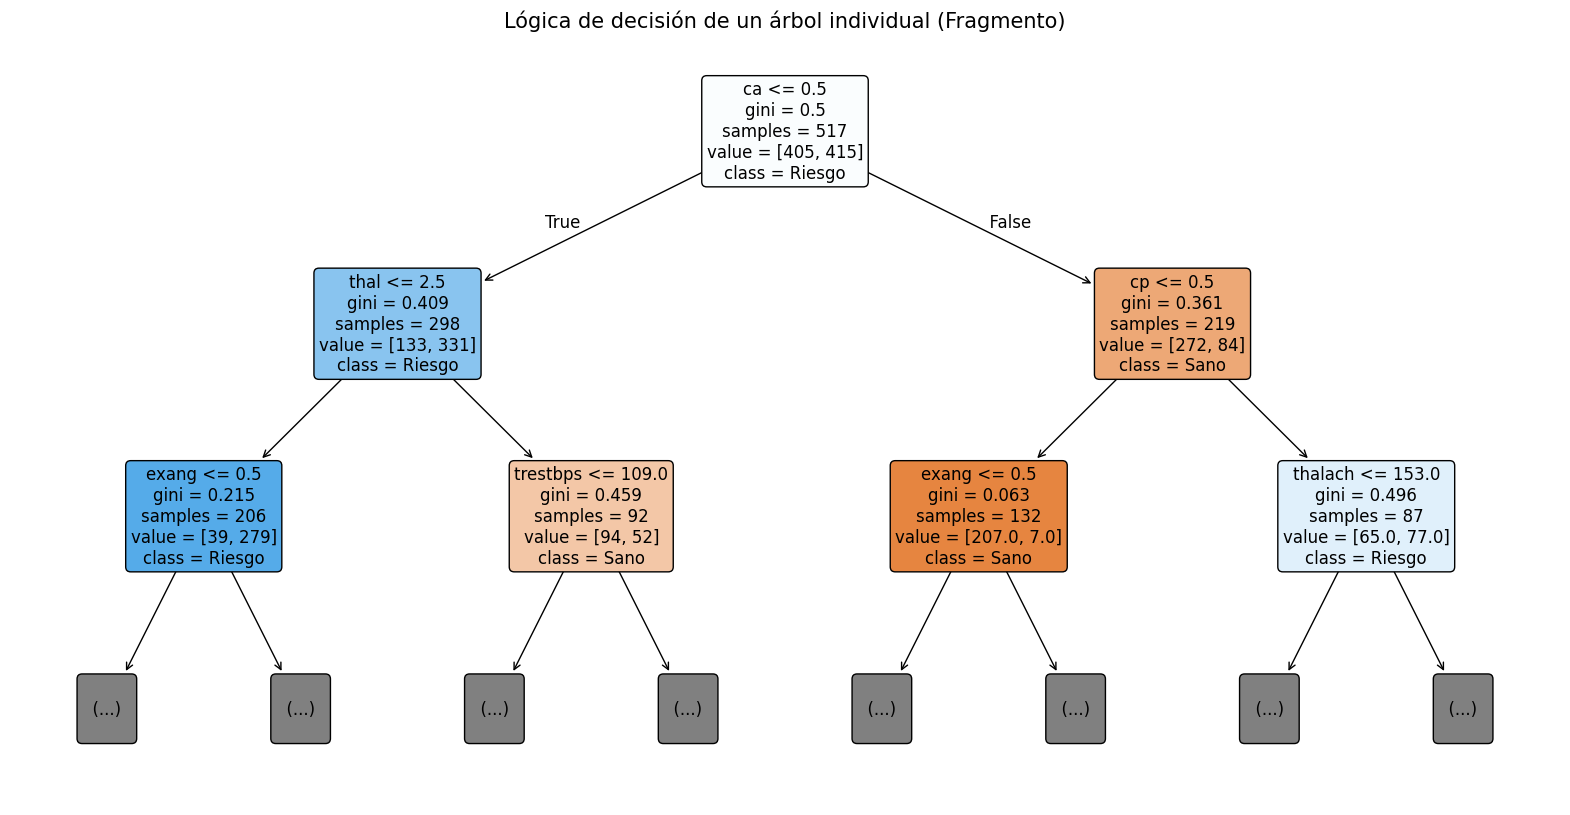

In [30]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

arbol_ejemplo = mejor_modelo_rf.estimators_[0]

# Configuramos la visualización
plt.figure(figsize=(20,10))
plot_tree(
    arbol_ejemplo, 
    feature_names=X_largo.columns, # Nombres de las variables médicas
    class_names=['Sano', 'Riesgo'], 
    filled=True,                   # Colores: azul para una clase, naranja para otra
    max_depth=2,                   # Limitamos la profundidad para que sea legible
    rounded=True,
    fontsize=12
)
plt.title("Lógica de decisión de un árbol individual (Fragmento)", fontsize=15)
plt.show()

<div style="background-color:green;color:white">

<br>

**Explica:**

* Qué variable aparece primero

        · CA


* Qué significa una condición tipo *chol <= 240*

        · Si el paciente cumple la condición, la predicción sigue por la rama izquierda. De lo contrario irá por la derecha


* Por qué **no debemos mostrar este árbol a un médico como modelo final**

        · A parte de porque este gráfico solo representa uno de los muchos árboles de nuestro modelo, porque su interpretación es bastante tosca.
        A un médico habrá que darle los datos ya interpretados y expresados de una manera limpia para que sea mucho más fácil entenderlos y comunicarlos.


<br>

---

### 5.2 Importancia de variables

En este apartado se va a analizar **qué variables son más importantes para el modelo Random Forest** a la hora de realizar sus predicciones.

Un Random Forest toma decisiones combinando muchos árboles de decisión. En cada árbol, las variables no se usan todas por igual: algunas aparecen con más frecuencia y generan **mejores divisiones** que reducen más la incertidumbre del modelo.
A partir de esta información, el modelo puede estimar la **importancia relativa de cada variable**.

---


#### Pistas para la implementación

* Los modelos `RandomForestClassifier` calculan automáticamente la importancia de las variables tras el entrenamiento.
* Esta información se encuentra en un **atributo del modelo**.
* Para interpretarla correctamente:

  * es conveniente asociar cada valor con el nombre de su variable,
  * y ordenar los resultados para facilitar el análisis.

📌 **Ayuda**
Consulta la documentación de `RandomForestClassifier` para identificar el atributo que almacena la importancia de las variables y su significado.


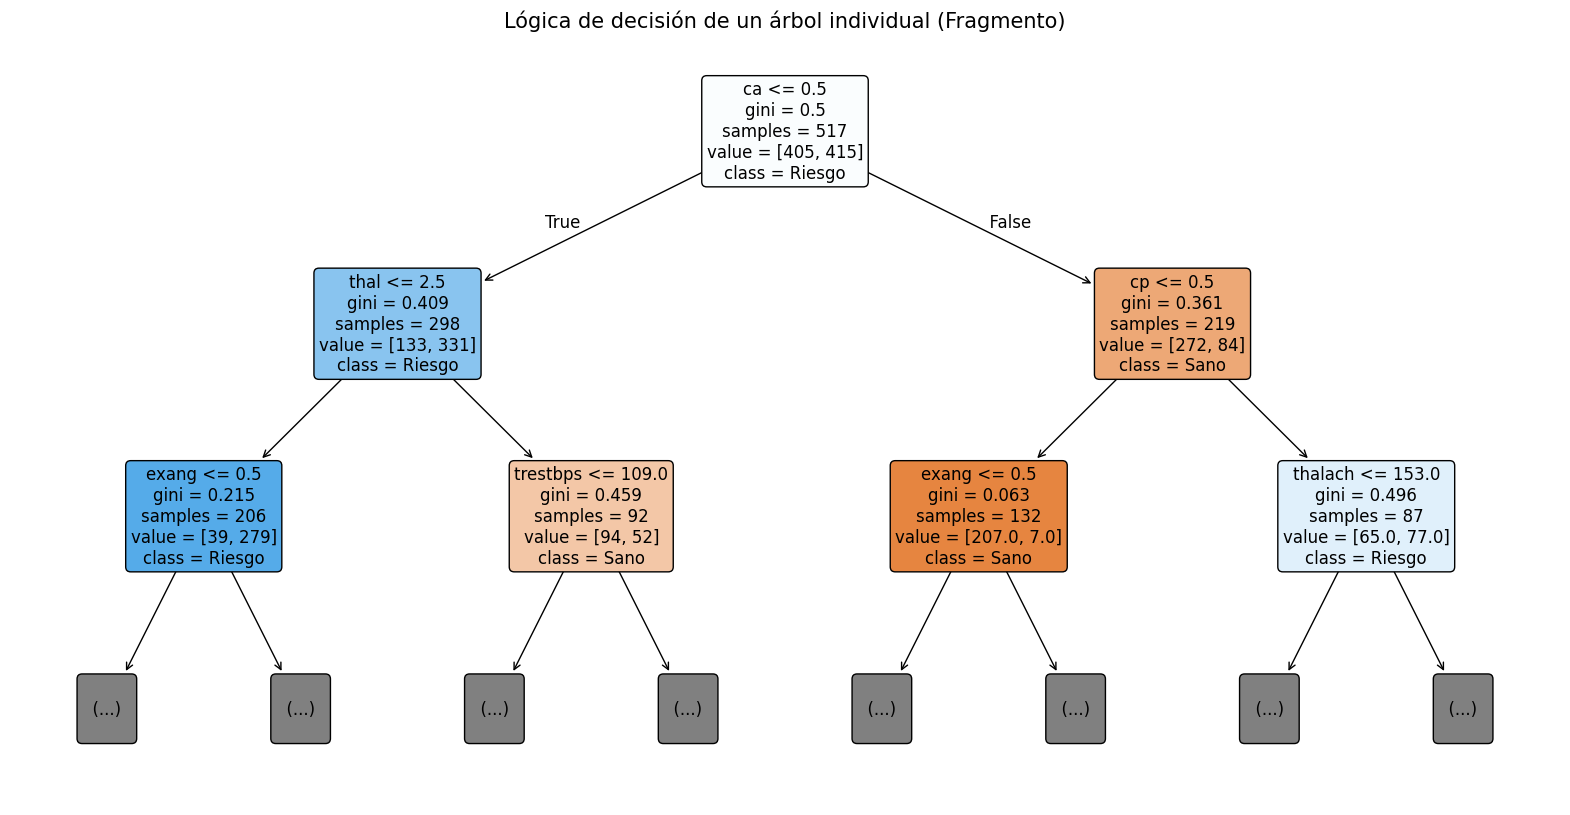

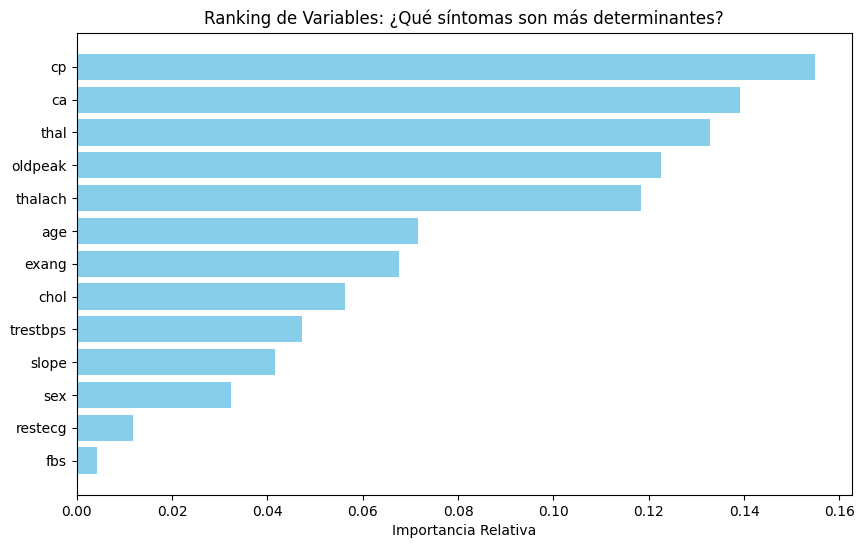

Tabla de importancias:
    Variable  Importancia
2         cp     0.154831
11        ca     0.139157
12      thal     0.132755
9    oldpeak     0.122500
7    thalach     0.118325
0        age     0.071589
8      exang     0.067608
4       chol     0.056181
3   trestbps     0.047170
10     slope     0.041534
1        sex     0.032295
6    restecg     0.011795
5        fbs     0.004262


In [ ]:
# 1. Extraemos el primer árbol de nuestro "bosque" optimizado
arbol_ejemplo = mejor_modelo_rf.estimators_[0]

# 2. Configuramos la visualización
plt.figure(figsize=(20,10))
plot_tree(
    arbol_ejemplo, 
    feature_names=X_largo.columns, # Nombres de las variables médicas
    class_names=['Sano', 'Riesgo'], 
    filled=True,                   # Colores: azul para una clase, naranja para otra
    max_depth=2,                   # Limitamos la profundidad para que sea legible
    rounded=True,
    fontsize=12
)
plt.title("Lógica de decisión de un árbol individual (Fragmento)", fontsize=15)
plt.show()

# Creamos un DataFrame con los nombres de las variables y su importancia
importancias = pd.DataFrame({
    'Variable': X_largo.columns,
    'Importancia': mejor_modelo_rf.feature_importances_
}).sort_values(by='Importancia', ascending=False)

# Creamos la gráfica de barras
plt.figure(figsize=(10, 6))
plt.barh(importancias['Variable'], importancias['Importancia'], color='skyblue')
plt.xlabel('Importancia Relativa')
plt.title('Ranking de Variables: ¿Qué síntomas son más determinantes?')
plt.gca().invert_yaxis() # La más importante arriba
plt.show()

print("Tabla de importancias:")
print(importancias)

<div style="background-color:green;color:white">

<br>

- ¿Coincide con lo que esperarías médicamente?

        · Sí. Dolor de pecho y nº de vasos obstruidos parecen datos bastante relevantes para identificar personas con riesgo de sufrir enfermedades cardiacas.

- ¿Qué variable eliminarías si quisieras simplificar aún más?

        · Eliminaría las últimas 3 o 4 variables, ya que serían las menos relevates

<br>

--

## Parte 6 – Comparación crítica de datasets

Entrena **el mismo modelo** con:

* dataset completo
* dataset de 4 variables


---

In [32]:
modelo_final = RandomForestClassifier(
    n_estimators=100, 
    max_depth=10, 
    min_samples_leaf=5, 
    random_state=42, 
    n_jobs=-1
)

# Entrenamiento y evaluación con dataset COMPLETO
modelo_final.fit(X_train_largo, y_train_largo)
y_pred_largo = modelo_final.predict(X_test_largo)
acc_largo = accuracy_score(y_test_largo, y_pred_largo)

# Entrenamiento y evaluación con dataset de 4 VARIABLES
modelo_final.fit(X_train_corto, y_train_corto)
y_pred_corto = modelo_final.predict(X_test_corto)
acc_corto = accuracy_score(y_test_corto, y_pred_corto)

print(f"Accuracy Dataset Completo (13 vars): {acc_largo:.4f}")
print(f"Accuracy Dataset Reducido (4 vars):   {acc_corto:.4f}")

Accuracy Dataset Completo (13 vars): 0.9122
Accuracy Dataset Reducido (4 vars):   0.7902


<div style="background-color:green;color:white">

<br>

Completa una tabla como esta:

| Dataset | Accuracy | Interpretabilidad | Riesgo de overfitting |
| ------- | ------------------- | ------------------------- | --------------------------- |

| Completo | 0.912 | Baja. Es más complicado hacer interpretaciones con tantas variables | Mayor al tener tantas variables con poco impacto|
| ------- | -------- | ----------------- | --------------------- |

| Reducido | 0.790 | Alta. Es fácil interpretar datos cuando el dataset tiene solo 4 variables | Mínimo, pues se ciñe a las variables esenciales |
| ------- | -------- | ----------------- | --------------------- |

<br>



<div style="background-color:green;color:white">

<br>

¿Qué modelo recomendarías *en un hospital pequeño* y por qué?

        · El corto, ya que es mucho más eficiente, y al no contar con tanto personal y recursos como uno grande, es clave la interpretabilidad de los resultados y minimizar problemas como el overfitting

<br>

---

## Parte 7 – Reflexión final

Responde brevemente (5–6 líneas cada una):

<div style="background-color:green;color:white">

<br>

1. ¿Por qué Random Forest es una buena elección aquí?

        · Porque entiende datasets que contengan tanto números (edad, colesterol) como categorías (tipo de dolor, sexo) sin tener que escalar o normalizar los datos.

        · Te permite ver qué datos son los que más peso tienen de forma sencilla

        · Al usar muchos árboles en lugar de uno solo, es mucho más difícil que el modelo caiga en el Overfitting
        

2. ¿Cuándo **no** usarías Random Forest?

        · Si necesitáramos predicciones en tiempo real en hardware de muy baja potencia, ya que como hemos visto, necesita muchos recursos para realizar los cálculos


3. ¿Qué mejorarías si tuvieras más datos?

        · Quizás un ajuste de hiperparámetros más fino sin miedo al overfitting


<br>
